In [1]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display

import numpy as np
import IPython.display as ipd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
dataset = pd.read_csv('Collected_audio.csv')
dataset.tail(10)

,file_names,class,class_id
100,Pulkit_S0.wav,Pulkit S,11
101,Pulkit_S1.wav,Pulkit S,11
102,Pulkit_S2.wav,Pulkit S,11
103,Pulkit_S3.wav,Pulkit S,11
104,Pulkit_S4.wav,Pulkit S,11
105,Pulkit_S5.wav,Pulkit S,11
106,Pulkit_S6.wav,Pulkit S,11
107,Pulkit_S7.wav,Pulkit S,11
108,Pulkit_S8.wav,Pulkit S,11
109,Pulkit_S9.wav,Pulkit S,11


In [2]:
dataset['class'].value_counts()

Aayush Gupta        10
Aman Anand          10
Abinash Dubey       10
Challa Priyankar    10
Viswamber Prasad    10
Akshay Hegde        10
Khushi Kumari       10
Abhilash S          10
Hitesh K            10
Sneha S             10
Pulkit S            10
Name: class, dtype: int64

Text(0.5, 1.0, 'Count of records in each class')

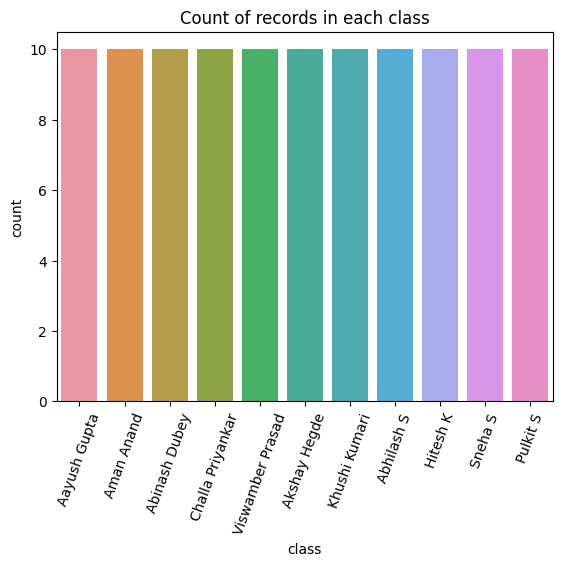

In [7]:
import seaborn as sns
ax = sns.countplot(x='class', data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
plt.title("Count of records in each class")

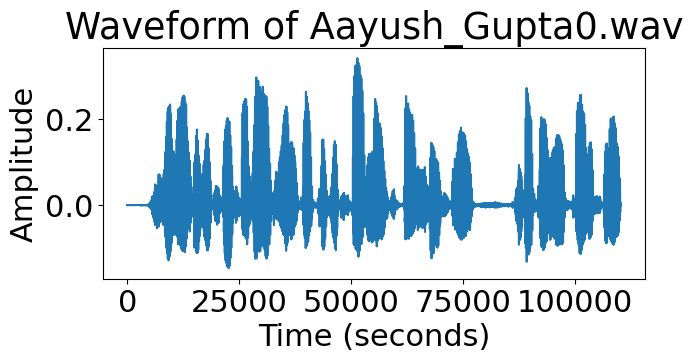

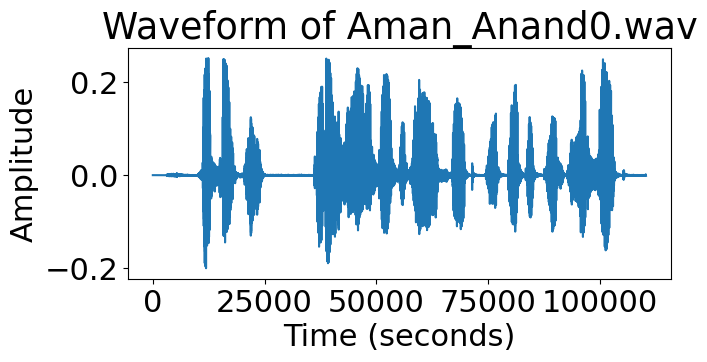

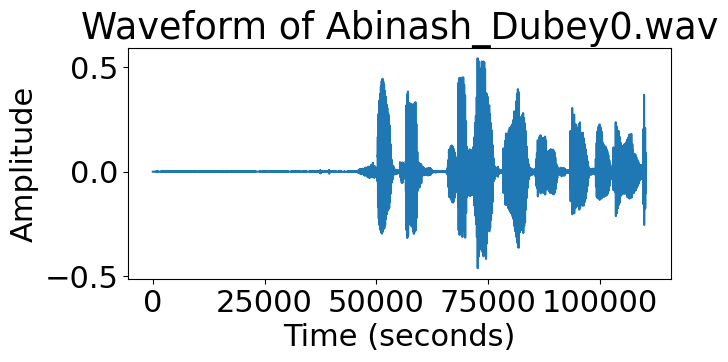

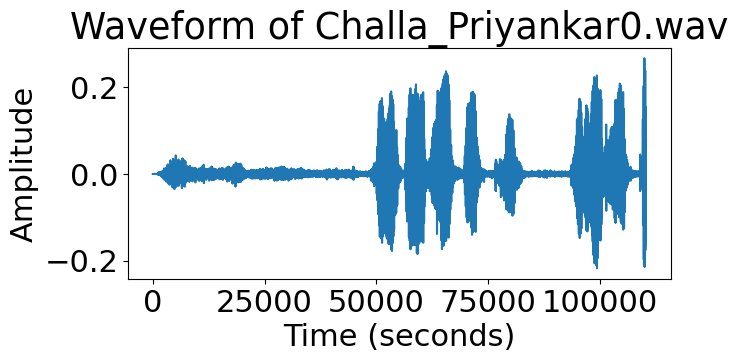

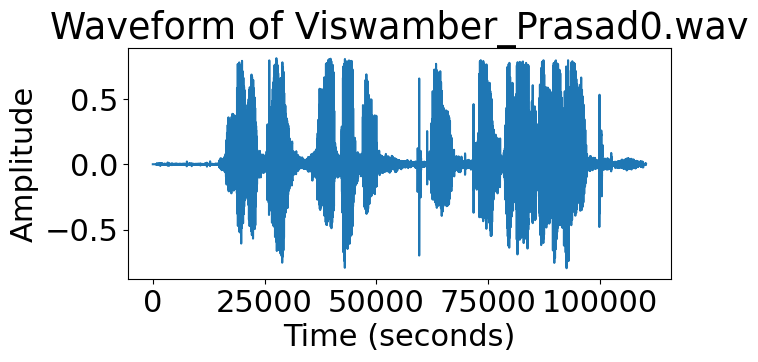

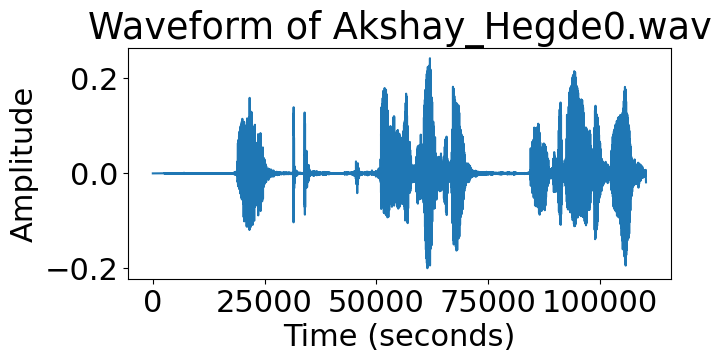

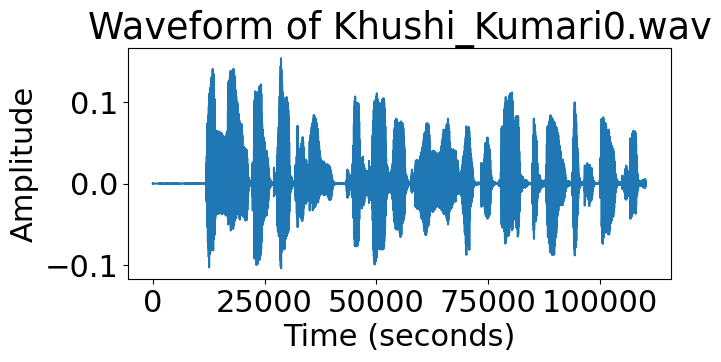

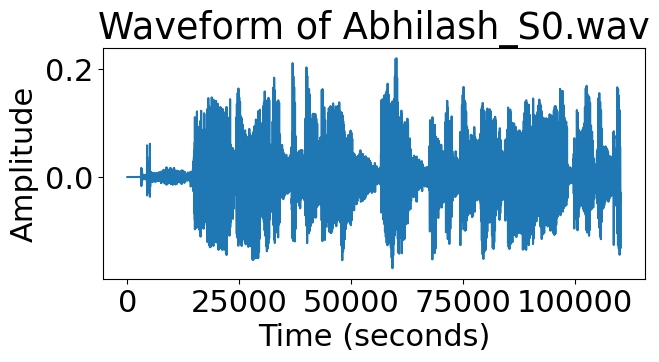

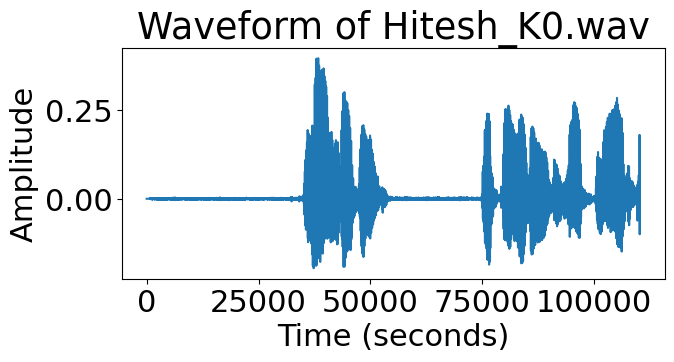

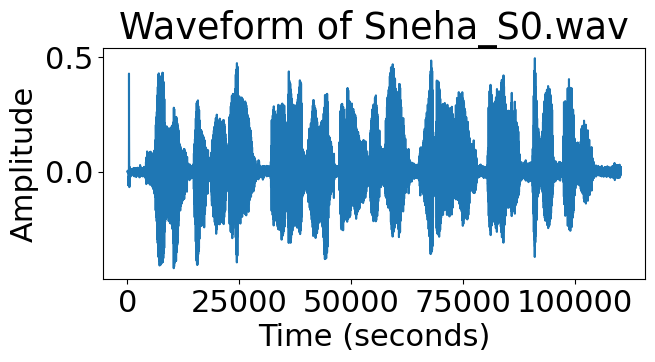

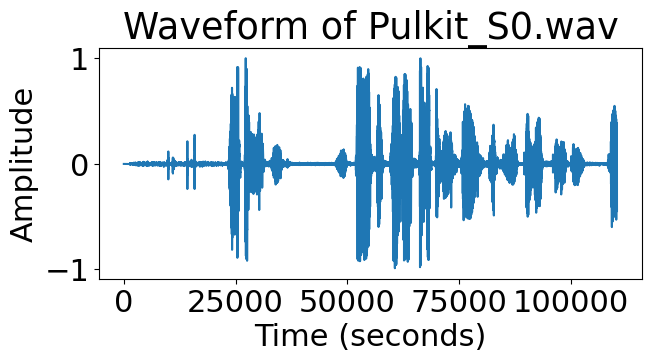

In [315]:
directory_path = 'audi'

# Load the CSV file that contains the file names and labels
csv_file_path = 'Collected_audio.csv'
data = pd.read_csv(csv_file_path)

# Loop through all classes
for     label in data['class_id'].unique():
        class_data = data[data['class_id'] == label]
    
    # Loop through all audio files in the class
        filename = class_data.iloc[0]['file_names']
        file_path = os.path.join(directory_path, filename)
        audio, sr = librosa.load(file_path)  # Load audio file
        
        # Extract waveform
        plt.figure(figsize=(7, 3))
        plt.plot(audio)
        plt.title(f'Waveform of {filename}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        plt.savefig('wave.png')
        plt.show()


In [3]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [4]:
audio_dataset_path = 'audi'

In [5]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(dataset.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_names"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

110it [00:21,  5.16it/s]


In [7]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.tail()

,feature,class
105,"[-191.74892, 112.636215, -7.6197543, 24.802933...",Pulkit S
106,"[-158.71602, 135.51215, -17.282457, 12.556745,...",Pulkit S
107,"[-211.20853, 138.26866, -12.526762, 8.270925, ...",Pulkit S
108,"[-200.1553, 120.16758, -8.592014, 23.074265, 2...",Pulkit S
109,"[-193.72, 120.75064, -0.61728585, 14.261876, 1...",Pulkit S


In [8]:
extracted_features_df.to_csv('features_extracted2.csv')

In [9]:
X_audio=np.array(extracted_features_df['feature'].tolist())
y_audio=np.array(extracted_features_df['class'].tolist())

In [10]:
unique_list = []
# traverse for all elements
for x in y_audio:
    # check if exists in unique_list or not
    if x not in unique_list:
        unique_list.append(x)
    # print list
print("category_name\n")

for x in unique_list:
    print(x)

category_name

Aayush Gupta
Aman Anand
Abinash Dubey
Challa Priyankar
Viswamber Prasad
Akshay Hegde
Khushi Kumari
Abhilash S
Hitesh K
Sneha S
Pulkit S


In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_audio =to_categorical(labelencoder.fit_transform(y_audio))

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_audio,y_audio,test_size=0.3,random_state=0)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [14]:
num_labels=y_audio.shape[1]

In [31]:
model=Sequential()

model.add(Dense(60,input_shape=(40,)))
model.add(Activation('relu'))


model.add(Dense(100))
model.add(Activation('relu'))


model.add(Dense(60))
model.add(Activation('relu'))
model.add(Dropout(0.3))


model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 60)                2460      
                                                                 
 activation_12 (Activation)  (None, 60)                0         
                                                                 
 dense_13 (Dense)            (None, 100)               6100      
                                                                 
 activation_13 (Activation)  (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 60)                6060      
                                                                 
 activation_14 (Activation)  (None, 60)                0         
                                                                 
 dropout_3 (Dropout)         (None, 60)               

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 80
num_batch_size = 16

checkpointer = ModelCheckpoint(filepath='deep3/audio_classify6.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/80
1/5 [=====>........................] - ETA: 6s - loss: 52.0480 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 16.16251, saving model to deep3\audio_classify6.hdf5
5/5 [==============================] - 2s 129ms/step - loss: 33.3138 - accuracy: 0.0519 - val_loss: 16.1625 - val_accuracy: 0.0909
Epoch 2/80
1/5 [=====>........................] - ETA: 0s - loss: 25.1251 - accuracy: 0.1250
Epoch 2: val_loss improved from 16.16251 to 6.54467, saving model to deep3\audio_classify6.hdf5
5/5 [==============================] - 0s 50ms/step - loss: 19.1317 - accuracy: 0.1429 - val_loss: 6.5447 - val_accuracy: 0.2121
Epoch 3/80
1/5 [=====>........................] - ETA: 0s - loss: 9.4985 - accuracy: 0.2500
Epoch 3: val_loss improved from 6.54467 to 4.17727, saving model to deep3\audio_classify6.hdf5
5/5 [==============================] - 0s 50ms/step - loss: 12.9554 - accuracy: 0.1558 - val_loss: 4.1773 - val_accuracy: 0.2727
Epoch 4/80
1/5 [=====>........................

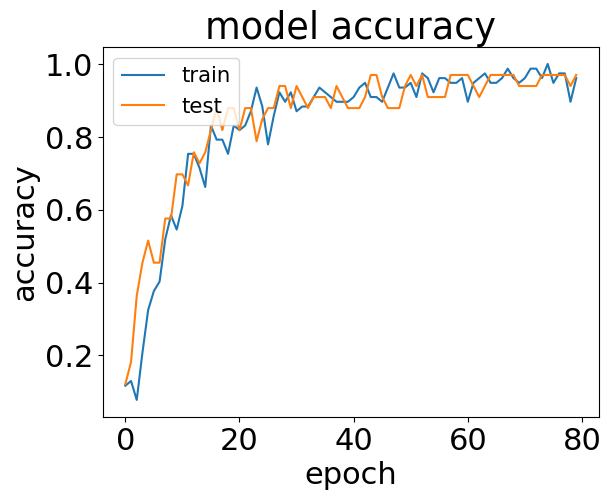

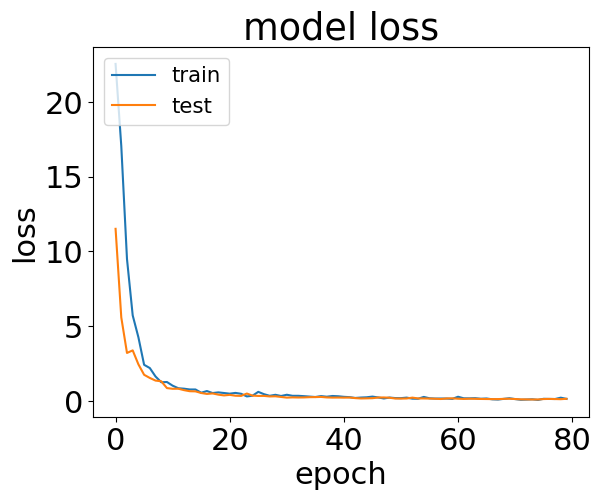

In [297]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left',fontsize = 'x-small')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left',fontsize = 'x-small')
plt.show()

In [298]:
folder_path = "Test"
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(folder_path, filename)
        audio, sample_rate = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        mfccs_scaled = mfccs_scaled.reshape(1, -1)
        
        predicted_label = model.predict(mfccs_scaled)
        classes = np.argmax(predicted_label, axis=1)
        prediction_label = predicted_label[0][classes]
        prediction_class = labelencoder.inverse_transform(classes)
        print(f"{filename}: {prediction_class[0]} (probability: {prediction_label.item():.2f})")

1/1 [==============================] - 0s 139ms/step
Aayush_Gupta10.wav: Aayush Gupta (probability: 0.82)
1/1 [==============================] - 0s 47ms/step
Aayush_Gupta11.wav: Aayush Gupta (probability: 0.88)
1/1 [==============================] - 0s 47ms/step
Abhilash_S10.wav: Abhilash S (probability: 0.98)
1/1 [==============================] - 0s 47ms/step
Akshay_Hegde10.wav: Akshay Hegde (probability: 1.00)
1/1 [==============================] - 0s 78ms/step
Akshay_Hegde11.wav: Akshay Hegde (probability: 1.00)
1/1 [==============================] - 0s 47ms/step
Akshay_Hegde12.wav: Akshay Hegde (probability: 1.00)
1/1 [==============================] - 0s 72ms/step
Hitesh_K10.wav: Hitesh K (probability: 1.00)
1/1 [==============================] - 0s 32ms/step
Hitesh_K11.wav: Hitesh K (probability: 1.00)
1/1 [==============================] - 0s 47ms/step
Khushi_Kumari10.wav: Khushi Kumari (probability: 1.00)
1/1 [==============================] - 0s 66ms/step
Khushi_Kumari11.wav:

In [24]:
model1=Sequential()

model1.add(Dense(60,input_shape=(40,)))
model1.add(Activation('tanh'))


model1.add(Dense(100))
model1.add(Activation('tanh'))


model1.add(Dense(60))
model1.add(Activation('tanh'))
model1.add(Dropout(0.3))


model1.add(Dense(num_labels))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [25]:
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 59)                2419      
                                                                 
 activation_4 (Activation)   (None, 59)                0         
                                                                 
 dense_5 (Dense)             (None, 100)               6000      
                                                                 
 activation_5 (Activation)   (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 59)                5959      
                                                                 
 activation_6 (Activation)   (None, 59)                0         
                                                                 
 dropout_1 (Dropout)         (None, 59)               

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 80
num_batch_size = 16

checkpointer = ModelCheckpoint(filepath='deep/classify.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history2 = model1.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/80
1/5 [=====>........................] - ETA: 7s - loss: 2.5155 - accuracy: 0.0625
Epoch 1: val_loss improved from inf to 2.30563, saving model to deep\classify6.hdf5
5/5 [==============================] - 2s 143ms/step - loss: 2.6082 - accuracy: 0.0779 - val_loss: 2.3056 - val_accuracy: 0.1818
Epoch 2/80
1/5 [=====>........................] - ETA: 0s - loss: 2.3859 - accuracy: 0.0625
Epoch 2: val_loss improved from 2.30563 to 2.22274, saving model to deep\classify6.hdf5
5/5 [==============================] - 0s 60ms/step - loss: 2.2619 - accuracy: 0.2338 - val_loss: 2.2227 - val_accuracy: 0.2121
Epoch 3/80
1/5 [=====>........................] - ETA: 0s - loss: 2.5714 - accuracy: 0.1250
Epoch 3: val_loss improved from 2.22274 to 2.05422, saving model to deep\classify6.hdf5
5/5 [==============================] - 0s 54ms/step - loss: 2.2124 - accuracy: 0.2208 - val_loss: 2.0542 - val_accuracy: 0.3333
Epoch 4/80
1/5 [=====>........................] - ETA: 0s - loss: 2.0298 - accu

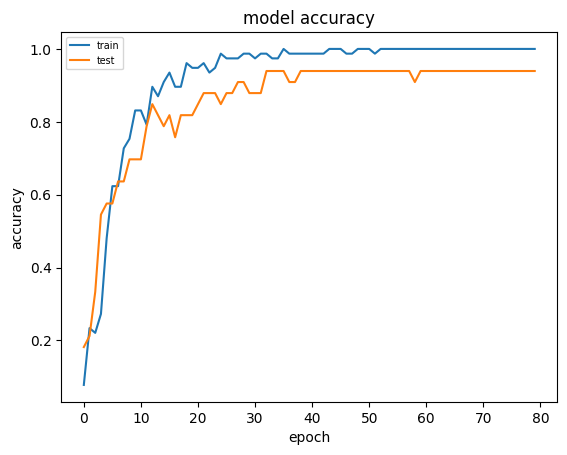

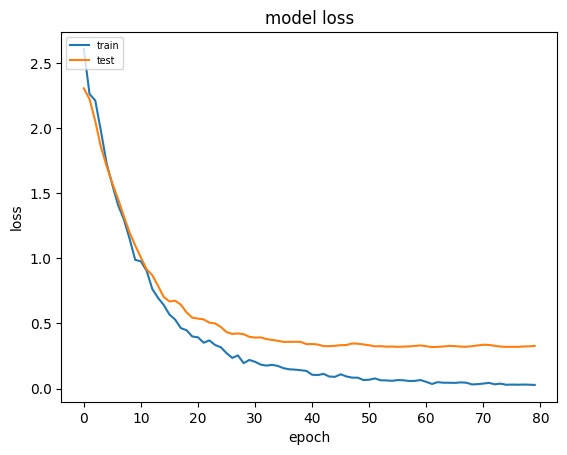

In [27]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left' , fontsize = 'x-small')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left' ,  fontsize = 'x-small')
plt.show()

In [306]:
folder_path = "Test"
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(folder_path, filename)
        audio, sample_rate = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        mfccs_scaled = mfccs_scaled.reshape(1, -1)
        
        predicted_label = model1.predict(mfccs_scaled)
        classes = np.argmax(predicted_label, axis=1)
        prediction_label = predicted_label[0][classes]
        prediction_class = labelencoder.inverse_transform(classes)
        print(f"{filename}: {prediction_class[0]} (probability: {prediction_label.item():.2f})")

1/1 [==============================] - 0s 124ms/step
Aayush_Gupta10.wav: Aayush Gupta (probability: 0.96)
1/1 [==============================] - 0s 47ms/step
Aayush_Gupta11.wav: Aayush Gupta (probability: 0.96)
1/1 [==============================] - 0s 47ms/step
Abhilash_S10.wav: Abhilash S (probability: 0.98)
1/1 [==============================] - 0s 63ms/step
Akshay_Hegde10.wav: Akshay Hegde (probability: 0.99)
1/1 [==============================] - 0s 55ms/step
Akshay_Hegde11.wav: Akshay Hegde (probability: 0.99)
1/1 [==============================] - 0s 43ms/step
Akshay_Hegde12.wav: Akshay Hegde (probability: 0.99)
1/1 [==============================] - 0s 55ms/step
Hitesh_K10.wav: Hitesh K (probability: 0.98)
1/1 [==============================] - 0s 40ms/step
Hitesh_K11.wav: Pulkit S (probability: 0.67)
1/1 [==============================] - 0s 70ms/step
Khushi_Kumari10.wav: Khushi Kumari (probability: 0.98)
1/1 [==============================] - 0s 48ms/step
Khushi_Kumari11.wav:

In [210]:
import sounddevice as sd
import numpy as np
import librosa

duration = 5  # duration of recording in seconds
sample_rate = 22050  # sampling rate of audio

print("Recording...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1)
sd.wait()
print("Recording finished.")

mfccs_features = librosa.feature.mfcc(y=audio[:, 0], sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
predicted_label = model.predict(mfccs_scaled_features)
classes_x = np.argmax(predicted_label, axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
print(prediction_class[0])


Recording...
Recording finished.
1/1 [==============================] - 0s 44ms/step
Khushi Kumari


2/2 [==============================] - 0s 16ms/step


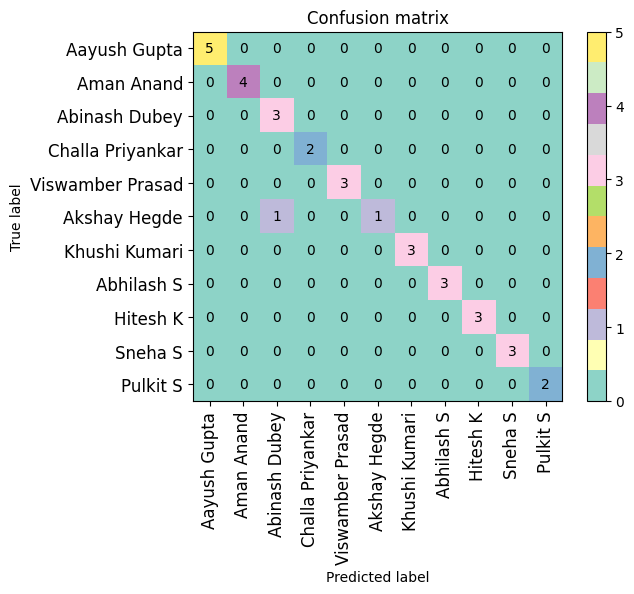

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)

cm = confusion_matrix(ytrue , ypred)
# Plot confusion matrix as a heatmap
plt.imshow(cm, cmap='Set3')

# Add numbers to each box
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 verticalalignment='center')

plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(range(len(unique_list)), unique_list, rotation=90 , fontsize = 12)
plt.yticks(range(len(unique_list)), unique_list , fontsize = 12)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [300]:
from sklearn.metrics import classification_report
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))



Classification Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2

    accuracy                           0.97        33
   macro avg       0.98      0.95      0.96        33
weighted avg       0.98      0.97      0.97        33



In [301]:
test_filename="chaiyya"

test_audio, test_sample_rate = librosa.load(test_filename) 
mfccs_features = librosa.feature.mfcc(y=test_audio, sr=test_sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
# print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
max_prob = np.max(predicted_label)
prediction_class = labelencoder.inverse_transform(classes_x)
print(prediction_class)
print(max_prob)

1/1 [==============================] - 0s 47ms/step
['Abinash Dubey']
0.930303


2/2 [==============================] - 0s 6ms/step


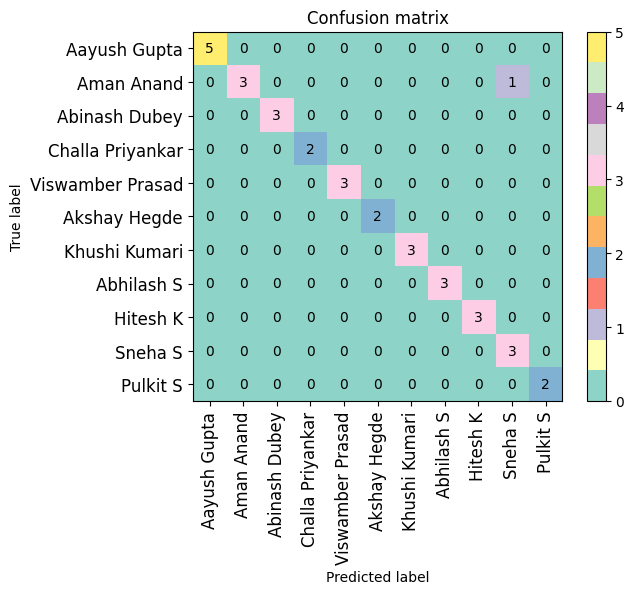

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model1.predict(X_test),axis=1)

cm = confusion_matrix(ytrue , ypred)
# Plot confusion matrix as a heatmap
plt.imshow(cm, cmap='Set3')

# Add numbers to each box
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 verticalalignment='center')

plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(range(len(unique_list)), unique_list, rotation=90 , fontsize = 12)
plt.yticks(range(len(unique_list)), unique_list , fontsize = 12)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [23]:
from sklearn.metrics import classification_report
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))



Classification Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2

    accuracy                           0.97        33
   macro avg       0.98      0.98      0.97        33
weighted avg       0.98      0.97      0.97        33



In [314]:
test_filename="chaiyya"

test_audio, test_sample_rate = librosa.load(test_filename) 
mfccs_features = librosa.feature.mfcc(y=test_audio, sr=test_sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
predicted_label=model1.predict(mfccs_scaled_features)
# print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
max_prob = np.max(predicted_label)
prediction_class = labelencoder.inverse_transform(classes_x)
print(prediction_class)
print(max_prob)

if max_prob < 0.65:
    print('Im not sure')

1/1 [==============================] - 0s 67ms/step
['Abinash Dubey']
0.9857868
